# Subspaces

In [1]:
# for conversion to PDF use these settings
# %matplotlib inline
# qr_setting = 'url'
# qrviz_setting = 'show'
#
# for lecture use notebook
%matplotlib notebook
qr_setting = 'url'
qrviz_setting = 'save'
#
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
import pandas as pd
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
reload(sl)
reload(ut);

So far have been working with vector spaces like $\mathbb{R}^2, \mathbb{R}^3.$  

But there are more vector spaces. . .  

Today we'll define a __subspace__ and show how the concept helps us understand the nature of matrices and their linear transformations.

__Definition.__  A _subspace_ is any set $H$ in $\mathbb{R}^n$ that has three properties:

1. The zero vector is in $H$.
2. For each $\mathbf{u}$ and $\mathbf{v}$ in $H$, the sum $\mathbf{u} + \mathbf{v}$ is in $H$.
3. For each $\mathbf{u}$ in $H$ and each scalar $c,$ the vector $c\mathbf{u}$ is in $H$.

Another way of stating properties 2 and 3 is that $H$ is _closed_ under addition and scalar multiplication.

__Examples.__  Many of the vector sets we've discussed so far are subspaces.

For example, if $\mathbf{v}_1$ and $\mathbf{v}_2$ are are in $\mathbb{R}^n$ and $H$ = Span$\{\mathbf{v}_1, \mathbf{v}_2\},$ then $H$ is a subspace of $\mathbb{R}^n$.

Let's check this:

1) The zero vector is in $H$ 

because ${\bf 0} = 0\mathbf{v}_1 + 0\mathbf{v}_2$ is in Span$\{\mathbf{v}_1, \mathbf{v}_2\}.$
      

2) The sum of any two vectors in $H$ is in $H$   

In other words, if $\mathbf{u} = s_1\mathbf{v}_1 + s_2\mathbf{v}_2,$ and $\mathbf{v} = t_1\mathbf{v}_1 + t_2\mathbf{v}_2,$ 

...their sum $\mathbf{u} + \mathbf{v}$ is $(s_1+t_1)\mathbf{v}_1 + (s_2+t_2)\mathbf{v}_2,$ 

...which is in $H$.
    

3) For any scalar $c$, $c\mathbf{u}$ is in $H$

because $c\mathbf{u} = c(s_1\mathbf{v}_1 + s_2\mathbf{v}_2) = (cs_1\mathbf{v}_1 + cs_2\mathbf{v}_2).$

<IPython.core.display.Javascript object>


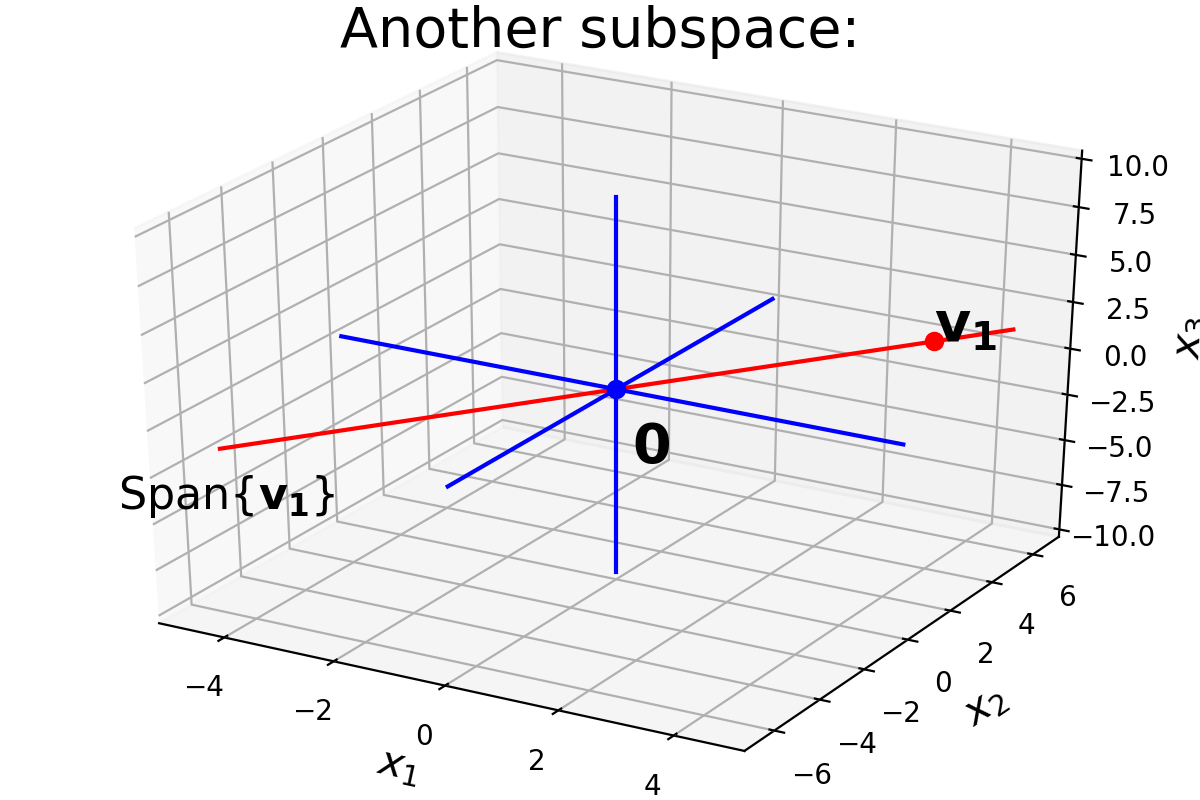

In [2]:
fig = ut.three_d_figure('Figure 14.2', fig_desc = 'Another subspace',
                        xmin = -5, xmax = 5, ymin = -7, ymax = 7, zmin = -10, zmax = 10, qr = qr_setting)
v = [ 4.0, 4.0, 2.0]
fig.text(v[0], v[1], v[2], r'$\bf v_1$', 'v1', size=20)
fig.text(-7, -5, -7, r'Span{$\bf v_1$}', 'Span{v1}', size=16)
fig.text(0.2, 0.2, -4, r'$\bf 0$', '0', size=20)
# plotting the span of v
# this is based on the reduced echelon matrix that expresses the system whose solution is v
fig.plotIntersection([1, 0, -v[0]/v[2], 0], [0, 1, -v[1]/v[2], 0], '-', 'Red')
fig.plotPoint(v[0], v[1], v[2], 'r')
fig.plotPoint(0, 0, 0, 'b')
# plotting the axes
fig.plotIntersection([0, 0, 1, 0], [0, 1, 0, 0])
fig.plotIntersection([0, 0, 1, 0], [1, 0, 0, 0])
fig.plotIntersection([0, 1, 0, 0], [1, 0, 0, 0])
fig.save('Fig14.2')
fig.ax.set_title('Another subspace:',size=20);

Because of this, we refer to Span$\{\mathbf{v}_1,\dots,\mathbf{v}_p\}$ as __the subspace spanned by $\mathbf{v}_1,\dots,\mathbf{v}_p.$__

Is __any__ line a subspace?   What about a line that is not through the origin?

In fact, a line $L$ not through the origin __fails all three__ requirements for a subspace:

1) $L$ does not contain the zero vector.

2) $L$ is not closed under addition.

3) $L$ is not closed under scalar multiplication.

Let's just look at 2):

<IPython.core.display.Javascript object>


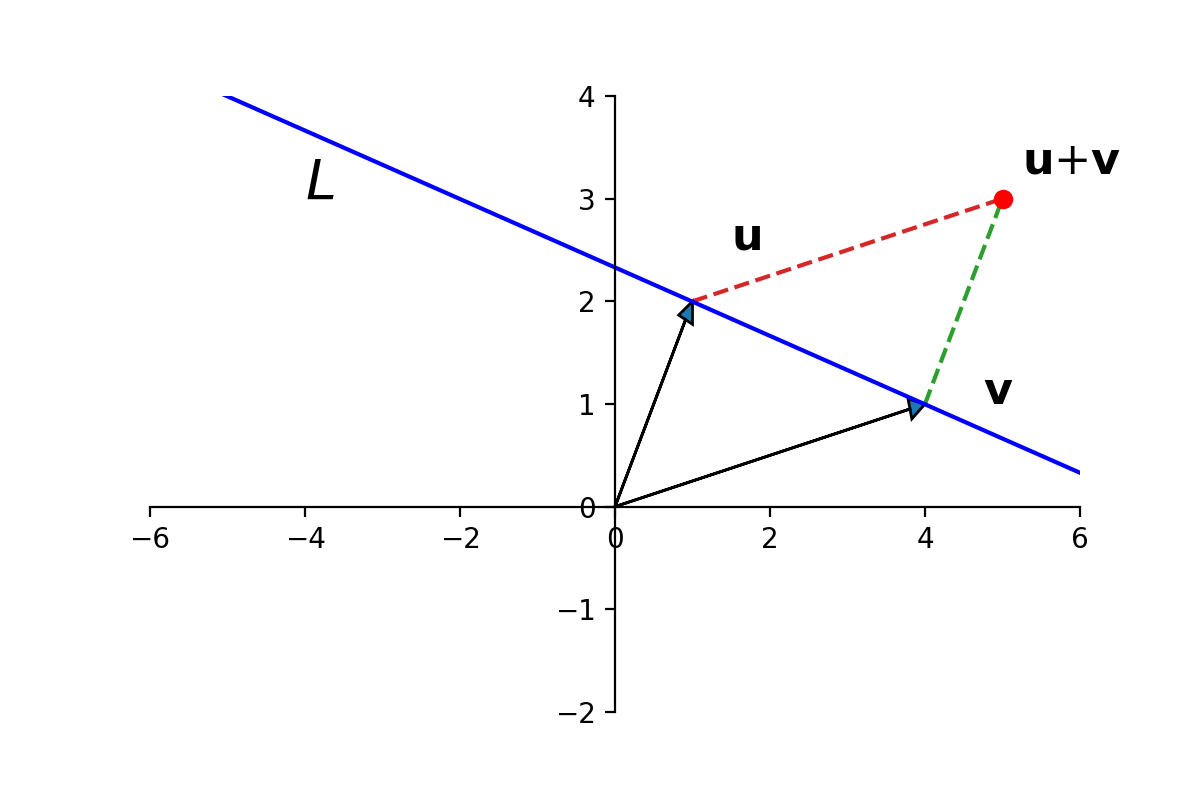

In [3]:
ax = ut.plotSetup()
ut.centerAxes(ax)
ax.arrow(0,0,1,2,head_width=0.2, head_length=0.2,length_includes_head = True)
ax.arrow(0,0,4,1,head_width=0.2, head_length=0.2,length_includes_head = True)
ax.plot([4,5],[1,3],'--')
ax.plot([1,5],[2,3],'--')
ax.plot([-6,6],[4.33,0.33],'b-')
ax.text(5.25,3.25,r'${\bf u}$+${\bf v}$',size=16)
ax.text(1.5,2.5,r'${\bf u}$',size=16)
ax.text(4.75,1,r'${\bf v}$',size=16)
ax.text(-4,3,'$L$',size=20)
ut.plotPoint(ax,5,3)
ax.plot(0,0,'');

## Question Time! Q14.1

## Column Space and Null Space of a Matrix

An important way to think about a matrix is in terms of two subspaces: __column space__ and __null space.__

__Definition.__  The __column space__ of a matrix $A$ is the set ${\operatorname{Col}}\ A$ of all linear combinations of the columns of $A$.

If $A$ = $[\mathbf{a}_1 \;\cdots\; \mathbf{a}_n]$, with columns in $\mathbb{R}^m,$ then ${\operatorname{Col}}\ A$ is the same as Span$\{\mathbf{a}_1,\dots,\mathbf{a}_n\}.$

The column space of an $m\times n$ matrix is a subspace of $\mathbb{R}^m.$  

In particular, note that ${\operatorname{Col}}\ A$ equals $\mathbb{R}^m$ only when the columns of $A$ span $\mathbb{R}^m.$   Otherwise, ${\operatorname{Col}}\ A$ is only part of $\mathbb{R}^m.$

When a system of linear equations is written in the form $A\mathbf{x} = \mathbf{b},$ the column space of $A$ is the set of all $\mathbf{b}$ for which the system has a solution. 

Equivalently, when we consider the linear operator $T: \mathbb{R}^n\rightarrow\mathbb{R}^m$ that is implemented by the matrix $A$, the column space of $A$ is the __range__ of $T.$

## Question Time!  Q14.2

__Definition.__ The __null space__ of a matrix $A$ is the set ${\operatorname{Nul}}\ A$ of all solutions of the homogeneous equation $A\mathbf{x} = 0.$

When $A$ has $n$ columns, a solution of $A\mathbf{x} = {\bf 0}$ is a vector in $\mathbb{R}^n.$  So the null space of $A$ is a subset of $\mathbb{R}^n.$   

In fact, ${\operatorname{Nul}}\ A$ is a __subspace__ of $\mathbb{R}^n.$

__Theorem.__  The null space of an $m\times n$ matrix $A$ is a subspace of $\mathbb{R}^n.$   

Equivalently, the set of all solutions of a system $A\mathbf{x} = {\bf 0}$ of $m$ homogeneous linear equations in $n$ unknowns is a subspace of $\mathbb{R}^n.$

__Proof.__

1) The zero vector is in ${\operatorname{Nul}}\ A$ because $A{\bf 0} = {\bf 0}.$

2) The sum of two vectors in ${\operatorname{Nul}}\ A$ is in ${\operatorname{Nul}}\ A.$

Take two vectors $\mathbf{u}$ and $\mathbf{v}$ that are in ${\operatorname{Nul}}\ A.$  By definition $A\mathbf{u} = {\bf 0}$ and $A\mathbf{v} = {\bf 0}.$

Then $\mathbf{u} + \mathbf{v}$ is in ${\operatorname{Nul}}\ A$ because $A(\mathbf{u} + \mathbf{v}) = A\mathbf{u} + A\mathbf{v} = {\bf 0} + {\bf 0} = {\bf 0}.$

3) Any scalar multiple of a vector in ${\operatorname{Nul}}\ A$ is in ${\operatorname{Nul}}\ A.$

Take a vector $\mathbf{v}$ that is in ${\operatorname{Nul}}\ A.$  Then $A(c\mathbf{v}) = cA\mathbf{v} = c{\bf 0} = {\bf 0}.$

Testing whether a vector $\mathbf{v}$ is in ${\operatorname{Nul}}\ A$ is easy: simply compute $A\mathbf{v}$ and see if the result is zero.

__Comparing ${\operatorname{Col}}\ A$ and ${\operatorname{Nul}}\ A$.__

What is the relationship between these two subspaces that are defined using $A$?

Actually, there is no particular connection (at this point in the course).

The important thing to note at present is that these two subspaces live in different "universes".   For an $m\times n$ matrix, the column space is a subset of $\mathbb{R}^m$ (all its vectors have $m$ components), while the null space is a subset of $\mathbb{R}^n$ (all its vectors have $n$ components).

(However: next lecture we will make a connection!)

## Basis for a Subspace

A subspace usually contains an infinite number of vectors.  

Often it is convenient to work with a small set of vectors that span the subspace.   The smaller the set, the better.   

It can be shown that the smallest possible spanning set must be linearly independent.

__Definition.__  A __basis__ for a subspace $H$ of $\mathbb{R}^n$ is a linearly independent set in $H$ that spans $H.$

__Example.__  The columns of __any__ invertible $n\times n$ matrix form a basis for $\mathbb{R}^n.$  This is because, by the Invertible Matrix Theorem, they are linearly independent, and they span $\mathbb{R}^n.$

So, for example, we could use the identity matrix, $I.$  It columns are $\mathbf{e}_1, \dots, \mathbf{e}_n.$

The set $\{\mathbf{e}_1,\dots,\mathbf{e}_n\}$ is called the __standard basis__ for $\mathbb{R}^n.$

<IPython.core.display.Javascript object>


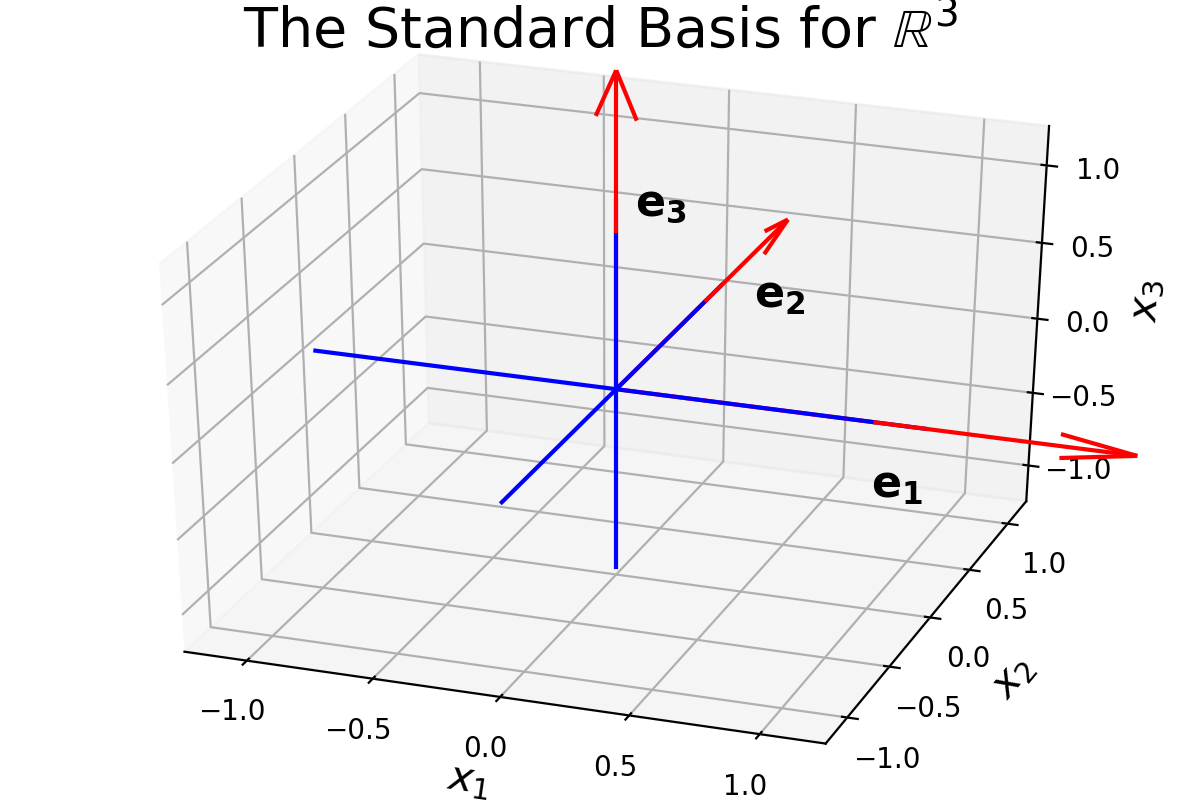

In [4]:
fig = ut.three_d_figure('Figure 14.3', fig_desc = 'The Standard Basis',
                        xmin = -1.2, xmax = 1.2, ymin = -1.2, ymax = 1.2, zmin = -1.2, zmax = 1.2, qr = qr_setting)
e1 = [1, 0, 0]
e2 = [0, 1, 0]
e3 = [0, 0, 1]
origin = [0, 0, 0]
fig.ax.quiver(e1, e2, e3, e1, e2, e3, length=1.0, color='Red')
fig.plotLine([[0, 0, 0], [0, 1, 0]], color='Red')
fig.plotLine([[0, 0, 0], [0, 0, 1]], color='Red')
fig.plotLine([[0, 0, 0], [1, 0, 0]], color='Red')
fig.text(1, 0, -0.5, r'${\bf e_1}$', 'e1', size=16)
fig.text(0.2, 1, 0, r'${\bf e_2}$', 'e2', size=16)
fig.text(0, 0.2, 1, r'${\bf e_3}$', 'e3', size=16)
# plotting the axes
fig.plotIntersection([0, 0, 1, 0], [0, 1, 0, 0])
fig.plotIntersection([0, 0, 1, 0], [1, 0, 0, 0])
fig.plotIntersection([0, 1, 0, 0], [1, 0, 0, 0])
fig.save('Fig14.3')
fig.ax.set_title(r'The Standard Basis for $\mathbb{R}^3$',size=20);

## Question Time! Q14.3

### Finding a basis for the nullspace.

We will often want to find a basis for ${\operatorname{Col}}\ A$ or for ${\operatorname{Nul}}\ A.$  

We'll start with finding a basis for the null space of a matrix.

__Example.__  Find a basis for the null space of the matrix

$$A = \begin{bmatrix}-3&6&-1&1&-7\\1&-2&2&3&-1\\2&-4&5&8&-4\end{bmatrix}.$$

__Solution.__  We would like to describe the set of all solutions of $A\mathbf{x} = {\bf 0}.$

We start by writing the solution of $A\mathbf{x} = {\bf 0}$ in parametric form:

$$[A \;{\bf 0}] \sim \begin{bmatrix}1&-2&0&-1&3&0\\0&0&1&2&-2&0\\0&0&0&0&0&0\end{bmatrix}, \;\;\;
\begin{array}{rrrrrcl}x_1&-2x_2&&-x_4&+3x_5&=&0\\&&x_3&+2x_4&-2x_5&=&0\\&&&&0&=&0\end{array}$$

So $x_1$ and $x_3$ are basic, and $x_2, x_4,$ and $x_5$ are free.

So the general solution is:

$$\begin{array}{rcl}x_1&=&2x_2 + x_4 -3x_5,\\
x_3&=&-2x_4 + 2x_5.\end{array}$$

Now, what we want to do is write the solution set as a weighted combination of vectors.  The free variables will become the weights.

$$\begin{bmatrix}x_1\\x_2\\x_3\\x_4\\x_5\end{bmatrix} = \begin{bmatrix}2x_2 + x_4 - 3x_5\\x_2\\-2x_4 + 2x_5\\x_4\\x_5\end{bmatrix} $$

$$ = 
x_2\begin{bmatrix}2\\1\\0\\0\\0\end{bmatrix}+x_4\begin{bmatrix}1\\0\\-2\\1\\0\end{bmatrix}+x_5\begin{bmatrix}-3\\0\\2\\0\\1\end{bmatrix} $$

$$= x_2\mathbf{u} + x_4\mathbf{v} + x_5{\bf w}.$$

Now what we have is an expression that describes the entire solution set of $A\mathbf{x} = {\bf 0}.$

So ${\operatorname{Nul}}\ A$ is the set of all linear combinations of $\mathbf{u}, \mathbf{v},$ and ${\bf w}$.  That is, ${\operatorname{Nul}}\ A$ is the subspace spanned by $\{\mathbf{u}, \mathbf{v}, {\bf w}\}.$

Furthermore, this construction automatically makes $\mathbf{u}, \mathbf{v},$ and ${\bf w}$ linearly independent.  

Since each weight appears by itself in one position, the only way for the whole weighted sum to be zero is if every weight is zero -- which is the definition of linear independence. 

So $\{\mathbf{u}, \mathbf{v}, {\bf w}\}$ is a __basis__ for ${\operatorname{Nul}}\ A.$

Conclusion: by finding a parametric description of the solution of the equation $A\mathbf{x} = {\bf 0},$ we can construct a basis for the nullspace of $A$.

### Finding a basis for the column space.

__Warmup.__ We start with a warmup example.  Suppose we have a matrix $B$ that happens to be in reduced echelon form:

$$B = \begin{bmatrix}1&0&-3&5&0\\0&1&2&-1&0\\0&0&0&0&1\\0&0&0&0&0\end{bmatrix}.$$

Denote the columns of $B$ by $\mathbf{b}_1,\dots,\mathbf{b}_5$ and note that $\mathbf{b}_3 = -3\mathbf{b}_1 + 2\mathbf{b}_2$ and $\mathbf{b}_4 = 5\mathbf{b}_1-\mathbf{b}_2.$

So any combination of $\mathbf{b}_1,\dots,\mathbf{b}_5$ is actually just a combination of $\mathbf{b}_1, \mathbf{b}_2,$ and $\mathbf{b}_5.$

So $\{\mathbf{b}_1, \mathbf{b}_2, \mathbf{b}_5\}$ spans ${\operatorname{Col}}\ B$.

Also, $\mathbf{b}_1, \mathbf{b}_2,$ and $\mathbf{b}_5$ are linearly independent, because they are columns from an identity matrix.  

So: the pivot columns of $B$ form a basis for ${\operatorname{Col}}\ B.$

Note that this means: __there is no combination of columns 1, 2, and 5 that yields the zero vector.__ (Other than the trivial combination of course.)

__The general case.__  Now I'll show that the pivot columns of $A$ form a basis for ${\operatorname{Col}}\ A$ __for any__ $A$.

Consider the case where $A\mathbf{x} = {\bf 0}$ for some nonzero $\mathbf{x}.$  

This says that there is a linear dependence relation between some of the columns of $A$.  

If any of the entries in $\mathbf{x}$ are zero, then those columns do not participate in the linear dependence relation.

When we row-reduce $A$ to its reduced echelon form $B$, the columns are changed, but the equations $A\mathbf{x} = {\bf 0}$ and $B\mathbf{x} = {\bf 0}$ have the same solution set.  

So this means that the columns of $A$ and the columns of $B$ _have exactly the same dependence relationships_ as the columns of $B$.

In other words:

1) If some column of $B$ can be written as a combination of other columns of $B$, then the same is true of the corresponding columns of $A$.

2) If no combination of certain columns of $B$ yields the zero vector, then no combination of correspnding columns of $A$ yields the zero vector.

In other words:

1) If some set of columns of $B$ spans the column space of $B$, then the same columns of $A$ span the column space of $A$.

2) If some set of columns of $B$ are linearly independent, then the same columns of $A$ are linearly independent.

So, if some columns of $B$ are a basis for ${\operatorname{Col}}\ B$, then the corresponding columns of $A$ are a basis for ${\operatorname{Col}}\ A$.

__Example.__ Consider the matrix $A$:

$$A = \begin{bmatrix}1&3&3&2&-9\\-2&-2&2&-8&2\\2&3&0&7&1\\3&4&-1&11&-8\end{bmatrix}$$

It is row equivalent to the matrix $B$ that we considered above.  So to find its basis, we simply need to look at the basis for its reduced row echelon form.  We already computed that a basis for ${\operatorname{Col}}\ B$ was columns 1, 2, and 5.

Therefore we can immediately conclude that a basis for ${\operatorname{Col}}\ A$ is $A$'s columns 1, 2, and 5.

So a basis for ${\operatorname{Col}}\ A$ is:

$$\left\{\begin{bmatrix}1\\-2\\2\\3\end{bmatrix},\begin{bmatrix}3\\-2\\3\\4\end{bmatrix},\begin{bmatrix}-9\\2\\1\\-8\end{bmatrix}\right\}$$

__Theorem.__  The pivot columns of a matrix $A$ form a basis for the column space of $A$.

Be careful here -- note that you compute the reduced row echelon form of $A$ to find which columns are pivot columns, but you used the columns of $A$ itself as the basis for ${\operatorname{Col}}\ A$!